# Load data

In [1]:
import app

df1, df_ret, df_vol =app.preprocess_data()

2024-11-07 14:52:11.754 | INFO     | app:preprocess_data:15 - Starting to preprocess data
2024-11-07 14:52:11.756 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TNX
2024-11-07 14:52:11.758 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SQ
2024-11-07 14:52:11.760 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^VIX
2024-11-07 14:52:11.761 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^XAU
2024-11-07 14:52:11.763 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^IRX
2024-11-07 14:52:11.764 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - RIOT
2024-11-07 14:52:11.766 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TYX
2024-11-07 14:52:11.768 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - NVDA
2024-11-07 14:52:11.770 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^FVX
2024-11-07 14:52:11.772 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SPY
2024-11-07 14:52:11.774

# Construct Crypto Market Index and Big Market (SPX + Crypto Market) Index

In [2]:
s_crypto_market, s_big_market = app.construct_market_factors(df1)

<Axes: >

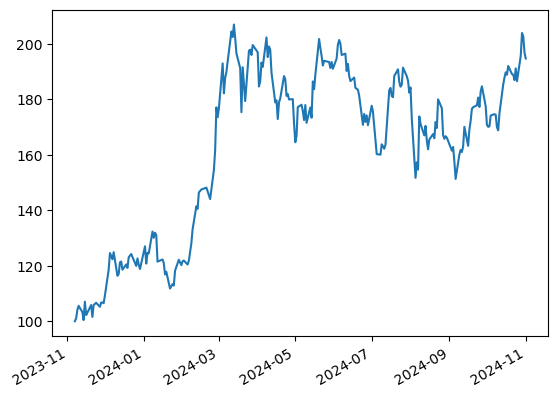

In [3]:
s_crypto_market.plot()

<Axes: >

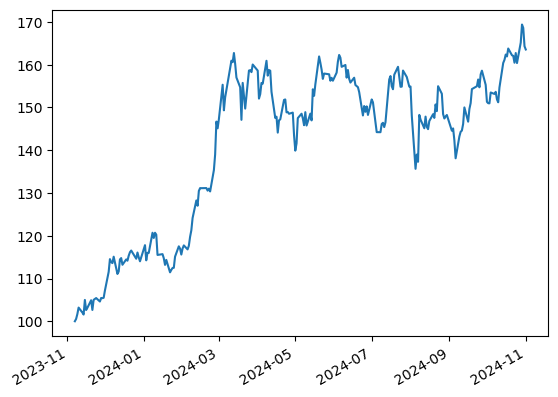

In [4]:
s_big_market.plot()

# Construct PCA Factors


Explained Variance Ratio:
[0.33243404 0.15652964 0.1084148  0.07056208 0.05458006]
Total Explained Variance Ratio: 0.7225


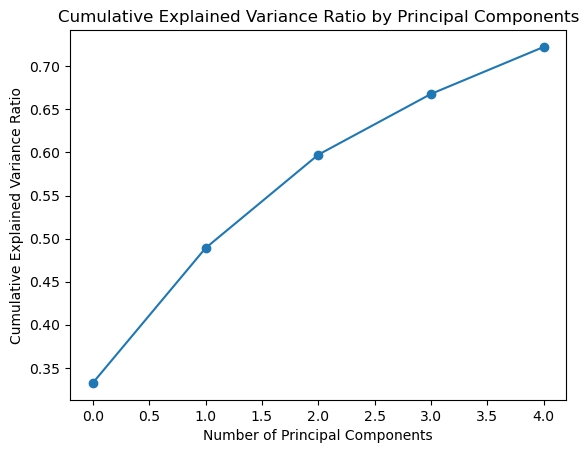

PCA Projection Loss 6.382025866894062


In [5]:
df_rets, pc_df, df_factor_loadings=app.construct_pca_factors(df1, s_big_market, s_crypto_market,n=5, standardize_return=True)

<Axes: >

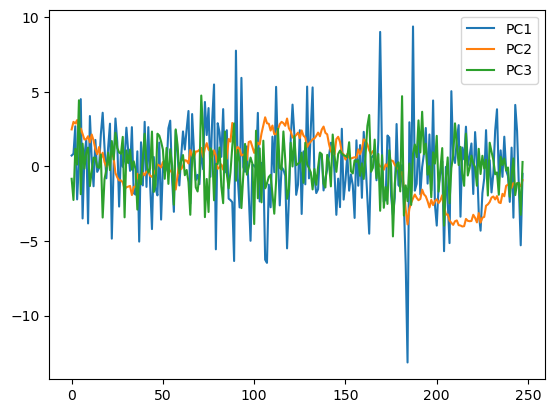

In [6]:
# Plot first 3 pc scores
pc_df.iloc[:, :3].plot()

In [7]:
df_factor_loadings

,bitcoin_prices,usd-coin_prices,tether_prices,solana_prices,chainlink_prices,ripple_prices,ethereum_prices,binancecoin_prices,dogecoin_prices,SQ_Close,...,SPY_Close,spy,big_market,crypto_market,^TNX_Close,^VIX_Close,^IRX_Close,^TYX_Close,^FVX_Close,median_spread
0,0.329621,0.035570,0.076147,0.267984,0.290752,0.238629,0.305250,0.254182,0.279365,0.153831,...,0.210054,0.210054,0.344720,0.330455,0.005690,-0.090204,0.013832,0.004224,0.007502,-0.013758
1,-0.012969,0.009405,-0.002258,0.002356,-0.024662,-0.023846,0.010037,-0.028658,-0.020428,-0.028816,...,0.009965,0.009965,-0.012104,-0.012419,0.496626,-0.278842,0.375043,0.454652,0.513813,0.244111
2,-0.189769,0.005033,0.067056,-0.105445,-0.072628,-0.138595,-0.135855,-0.114258,-0.153549,0.308823,...,0.480688,0.480688,-0.100938,-0.189230,-0.047001,-0.153765,0.034131,-0.055318,-0.033876,-0.050297
3,0.037771,0.686184,0.671458,-0.018962,-0.062677,-0.058387,-0.030791,-0.094474,-0.044720,-0.057003,...,-0.028038,-0.028038,0.025730,0.036117,-0.012959,0.034294,-0.014222,-0.006070,-0.019112,0.107887
4,0.003102,0.001994,-0.063354,0.049657,-0.004090,-0.003064,0.027110,0.106911,-0.000006,-0.078413,...,-0.041881,-0.041881,-0.004237,0.003506,-0.283343,-0.463310,0.448291,-0.422568,-0.160045,0.480777


# Restore returns using PCA

In [8]:
from lib.factor_analysis import restore_rets
restore_rets(df_factor_loadings, pc_df, df_rets, n=3)

,bitcoin_prices,usd-coin_prices,tether_prices,solana_prices,chainlink_prices,ripple_prices,ethereum_prices,binancecoin_prices,dogecoin_prices,SQ_Close,...,SPY_Close,spy,big_market,crypto_market,^TNX_Close,^VIX_Close,^IRX_Close,^TYX_Close,^FVX_Close,median_spread
2023-11-08,0.015828,0.000043,-0.000008,0.023046,0.011064,0.008151,0.016753,0.011872,0.021264,-0.004232,...,-0.000497,-0.000497,0.008596,0.015897,4.511817,13.125417,5.326770,4.625033,4.548960,0.015445
2023-11-09,0.026136,0.000044,-0.000081,0.033161,0.017198,0.016118,0.026303,0.018456,0.035366,-0.016488,...,-0.005472,-0.005472,0.012300,0.026227,4.593971,13.346970,5.362603,4.690133,4.649641,0.017051
2023-11-10,0.024701,0.000121,0.000228,0.040503,0.031482,0.014884,0.030216,0.021422,0.034810,0.021450,...,0.010040,0.010040,0.018375,0.024901,4.540668,11.160912,5.387986,4.640981,4.597435,0.015176
2023-11-13,-0.023804,-0.000046,-0.000142,-0.026240,-0.035245,-0.023660,-0.025008,-0.020584,-0.036300,-0.009203,...,-0.001671,-0.001671,-0.014748,-0.023925,4.575966,12.944379,5.383585,4.671152,4.635906,0.016651
2023-11-14,-0.023168,0.000050,0.000259,-0.014339,-0.013711,-0.022866,-0.018075,-0.014295,-0.033034,0.039875,...,0.018056,0.018056,-0.005583,-0.023152,4.412345,10.837191,5.344797,4.537075,4.443980,0.012739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,0.062875,0.000118,0.000153,0.079503,0.068166,0.047540,0.063682,0.052525,0.091279,0.004007,...,0.000650,0.000650,0.036293,0.063111,4.049959,16.108997,4.975955,4.281750,3.941341,0.007912
2024-10-29,0.038044,0.000064,0.000086,0.048956,0.040212,0.027740,0.037595,0.032596,0.055437,0.003194,...,0.000753,0.000753,0.022048,0.038162,4.054840,16.106531,4.989156,4.283721,3.950598,0.008051
2024-10-30,-0.005409,-0.000065,-0.000154,-0.008349,-0.014747,-0.006679,-0.010517,-0.003656,-0.007685,-0.012985,...,-0.005234,-0.005234,-0.005614,-0.005549,4.038571,17.297755,4.968705,4.272244,3.927493,0.008312
2024-10-31,-0.034696,-0.000205,-0.000516,-0.052926,-0.061895,-0.029739,-0.046559,-0.030626,-0.051117,-0.048169,...,-0.019242,-0.019242,-0.028689,-0.035089,4.042535,19.644574,4.924790,4.281575,3.920309,0.009389
